In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [4]:
DATA_DIR = "./data.csv"

In [150]:
dat=pd.read_csv(DATA_DIR,encoding='utf-8')

In [151]:
dat = dat.drop(dat.columns[0], axis=1)

In [152]:
dat.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [153]:
dat.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [154]:
# Removing spaces in the column names to enable easy column reference  
dat.columns = dat.columns.str.replace(' ','')

In [155]:
# Removing special characters (e.g. euro dollar sign)
euro_sign = dat['ReleaseClause'][0][0]

dat['ReleaseClause'] = dat['ReleaseClause'].str.replace(euro_sign,'')
dat['Value'] = dat['Value'].str.replace(euro_sign,'')
dat['Wage'] = dat['Wage'].str.replace(euro_sign,'')
dat['ReleaseClause'] = dat['ReleaseClause'].str.replace('M','') # Removing Millions in the field
dat['Value'] = dat['Value'].str.replace('M','') # Removing Millions in the field
dat['Wage'] = dat['Wage'].str.replace('K','') # Removing Thousands in the field

# Converting wages,release clause, value from string into integers/float
dat.ReleaseClause = pd.to_numeric(dat.ReleaseClause, errors='coerce')
dat.Value = pd.to_numeric(dat.Value, errors='coerce')
dat.Wage = pd.to_numeric(dat.Wage, errors='coerce')
dat.Age = pd.to_numeric(dat.Age, errors='coerce')

# Converting Weight from string into integers/float
dat['Weight'] = dat['Weight'].str.replace('lbs','') # Removing lbs in the field
dat.Weight = pd.to_numeric(dat.Weight, errors='coerce')
# Use Regular Expression to convert Height from feet + inches into cm. Convert from text into integer
r = re.compile(r"([0-9]+)'([0-9]+)")    # to set the pattern e.g. 5'7 , 4'12 etc
def get_cm(height):
    height = str(height)
    m = r.match(height)
    if m == None:
        return float('NaN')
    else:
        return float(m.group(1))*30.48 + float(m.group(2))*2.54
dat["Height"] = dat["Height"].apply(lambda x:get_cm(x))

In [109]:
# check
# dat['ReleaseClause'].head()
# dat['Wage'].head()
# dat['Value'].head()
# dat['Weight'].head()
# dat['Height'].head()

In [110]:
# Drop unnecessary columns that are not used for analyzing a player's performance
# This inclues: 'Real Face', 'Jersey Number', 'Loaned From' LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM
# CDM, RDM, RWB LB, LCB, CB, RCB, RB
dat = dat.drop(dat.columns[27:53], axis = 1)
dat = dat.drop(labels = ['RealFace','JerseyNumber','LoanedFrom'], axis = 1)
dat.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4


In [111]:
# Check for missing values
# Check if there any null values in the dataset
dat.isna().values.any() # There are indeed missing values in some rows in the dataset

True

In [112]:
print(dat.shape)

(18207, 59)


In [116]:
print(dat.dropna().shape)
# dat.isna().values.any()

(6197, 59)


In [114]:
# set mean values to all empty entries
# dat['Crossing'].fillna(dat['Crossing'].mean(),inplace=True)
# dat['Finishing'].fillna(dat['Finishing'].mean(),inplace=True)
# dat['HeadingAccuracy'].fillna(dat['HeadingAccuracy'].mean(),inplace=True)
# dat['ShortPassing'].fillna(dat['ShortPassing'].mean(),inplace=True)
# dat['Volleys'].fillna(dat['Volleys'].mean(),inplace=True)
# dat['Dribbling'].fillna(dat['Dribbling'].mean(), inplace=True)
# dat['Curve'].fillna(dat['Curve'].mean(),inplace=True)
# dat['FKAccuracy'].fillna(dat['FKAccuracy'].mean(),inplace=True)
# dat['LongPassing'].fillna(dat['LongPassing'].mean(),inplace=True)
# dat['BallControl'].fillna(dat['BallControl'].mean(),inplace=True)
# dat['Acceleration'].fillna(dat['Acceleration'].mean(),inplace=True)
# dat['SprintSpeed'].fillna(dat['SprintSpeed'].mean(),inplace=True)
# dat['Agility'].fillna(dat['Agility'].mean(),inplace=True)
# dat['Reactions'].fillna(dat['Reactions'].mean(),inplace=True)
# dat['Balance'].fillna(dat['Balance'].mean(),inplace=True)
# dat['ShotPower'].fillna(dat['ShotPower'].mean(),inplace=True)
# dat['Jumping'].fillna(dat['Jumping'].mean(),inplace=True)
# dat['Stamina'].fillna(dat['Stamina'].mean(),inplace=True)
# dat['Strength'].fillna(dat['Strength'].mean(),inplace=True)
# dat['LongShots'].fillna(dat['LongShots'].mean(),inplace=True)
# dat['Aggression'].fillna(dat['Aggression'].mean(),inplace=True)
# dat['Interceptions'].fillna(dat['Interceptions'].mean(),inplace=True)
# dat['Positioning'].fillna(dat['Positioning'].mean(),inplace=True)
# dat['Vision'].fillna(dat['Vision'].mean(),inplace=True)
# dat['Penalties'].fillna(dat['Penalties'].mean(),inplace=True)
# dat['Composure'].fillna(dat['Composure'].mean(),inplace=True)
# dat['Marking'].fillna(dat['Marking'].mean(),inplace=True)
# dat['StandingTackle'].fillna(dat['StandingTackle'].mean(),inplace=True)
# dat['SlidingTackle'].fillna(dat['SlidingTackle'].mean(),inplace=True)
# dat['GKDiving'].fillna(dat['GKDiving'].mean(),inplace=True)
# dat['GKHandling'].fillna(dat['GKHandling'].mean(),inplace=True)
# dat['GKKicking'].fillna(dat['GKKicking'].mean(),inplace=True)
# dat['GKPositioning'].fillna(dat['GKPositioning'].mean(),inplace=True)

In [118]:
dat.dropna(inplace=True)
print(dat.shape)

(6197, 59)


In [123]:
'''
The equations here require future discussion.
'''
# Develop the FIFA attributes: Pace, Shooting, Passing, Dribbling, Defending, Physical
# Each of these attributes are made up of the following skills (https://www.fifauteam.com/fifa-18-attributes-guide/)
# Pace: Sprint Speed, Acceleration
# Shooting: FINISHING, LONG SHOTS, PENALTIES, POSITIONING, SHOT POWER, VOLLEYS
# PASSING: CROSSING, CURVE, FREE KICK, LONG PASSING, SHORT PASSING, VISION
# DRIBBLING: AGILITY, BALANCE, BALL CONTROL, COMPOSURE, DRIBBLING, REACTIONS
# DEFENDING: HEADING, INTERCEPTIONS, MARKING, SLIDING TACKLE, STANDING TACKLE
# PHYSICAL: AGGRESSION, JUMPING, STAMINA, STRENGTH
# GOALKEEPING: DIVING, HANDLING, KICKING, POSITIONING
dat['Pace'] = ( dat['SprintSpeed'] + dat['Acceleration'] ) /2 
dat['Shooting'] = ( dat['Finishing'] + dat['LongShots'] + dat['Penalties'] + dat['Positioning'] + dat['ShotPower'] + dat['Volleys'] ) / 6
dat['Passing'] = ( dat['Crossing'] + dat['Curve'] + dat['FKAccuracy'] + dat['LongPassing'] + dat['ShortPassing'] + dat['Vision'] ) / 6
dat['Dribbling Skill'] = ( dat['HeadingAccuracy'] + dat['Interceptions'] + dat['Marking'] + dat['StandingTackle'] + dat['SlidingTackle'] ) / 5
dat['Physical'] = ( dat['Aggression'] + dat['Jumping'] + dat['Stamina'] + dat['Strength'] ) / 4
dat['Goal Keeping'] = ( dat['GKDiving'] + dat['GKHandling'] + dat['GKKicking'] + dat['GKPositioning'] ) / 4
dat.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,Position,Joined,ContractValidUntil,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,Pace,Shooting,Passing,Dribbling Skill,Physical,Goal Keeping
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110.5,565,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,"Jul 1, 2004",2021,170.18,159.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,88.5,88.166667,90.333333,35.8,61.75,11.50
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77.0,405,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,"Jul 10, 2018",2022,187.96,183.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,90.0,91.500000,80.166667,40.0,81.25,11.75
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118.5,290,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,"Aug 3, 2017",2022,175.26,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,92.0,83.833333,83.833333,36.4,61.75,12.00
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72.0,260,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,"Jul 1, 2011",2020,193.04,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,57.5,20.166667,37.666667,20.0,53.00,87.50
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102.0,355,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,"Aug 30, 2015",2023,180.34,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,77.0,85.333333,89.666667,58.6,76.00,10.75


In [120]:
# The top 10 players based on the overall score are:
top_10 = dat.nlargest(10, 'Overall')
top_10[['Name','Overall','Club','Position']]

,Name,Overall,Club,Position
0,L. Messi,94,FC Barcelona,RF
1,Cristiano Ronaldo,94,Juventus,ST
2,Neymar Jr,92,Paris Saint-Germain,LW
3,De Gea,91,Manchester United,GK
4,K. De Bruyne,91,Manchester City,RCM
5,E. Hazard,91,Chelsea,LF
6,L. Modrić,91,Real Madrid,RCM
7,L. Suárez,91,FC Barcelona,RS
8,Sergio Ramos,91,Real Madrid,RCB
9,J. Oblak,90,Atlético Madrid,GK


In [131]:
# The best players in each position are (based on the overall score):
pd.set_option('display.max_columns', None)
top_3_position = dat.groupby(['Position']).apply(lambda x: x.sort_values(['Overall'],ascending = False) )
# top_3_position.groupby(level=0).head(1).sort_values(['Overall'],ascending = False)

ID             Name  Age  \
Position                                    
CAM      17  194765     A. Griezmann   27   
         31  190460       C. Eriksen   26   
         61  201942  Roberto Firmino   26   
         66  189596        T. Müller   28   
         74  176635          M. Özil   29   

                                                      Photo Nationality  \
Position                                                                  
CAM      17  https://cdn.sofifa.org/players/4/19/194765.png      France   
         31  https://cdn.sofifa.org/players/4/19/190460.png     Denmark   
         61  https://cdn.sofifa.org/players/4/19/201942.png      Brazil   
         66  https://cdn.sofifa.org/players/4/19/189596.png     Germany   
         74  https://cdn.sofifa.org/players/4/19/176635.png     Germany   

                                            Flag  Overall  Potential  \
Position                                                               
CAM      17  https://cdn.sofifa.org/flags/18.png       89         90   
         31  https://cdn.sofifa.org/flags/13.png       88         91   
         61  https://cdn.sofifa.org/flags/54.png       86         87   
         66  https://cdn.sofifa.org/flags/21.png       86         86   
         74  https://cdn.sofifa.org/flags/21.png       86         86   

                          Club                                      ClubLogo  \
Position                                                                       
CAM      17    Atlético Madrid  https://cdn.sofifa.org/teams/2/light/240.png   
         31  Tottenham Hotspur   https://cdn.sofifa.org/teams/2/light/18.png   
         61          Liverpool    https://cdn.sofifa.org/teams/2/light/9.png   
         66  FC Bayern München   https://cdn.sofifa.org/teams/2/light/21.png   
         74            Arsenal    https://cdn.sofifa.org/teams/2/light/1.png   

             Value  Wage  Special PreferredFoot  InternationalReputation  \
Position                                                                   
CAM      17   78.0   145     2246          Left                      4.0   
         31   73.5   205     2117         Right                      3.0   
         61   53.0   195     2187         Right                      3.0   
         66   45.0   135     2097         Right                      4.0   
         74   43.5   190     1911          Left                      4.0   

             WeakFoot  SkillMoves      WorkRate BodyType Position  \
Position                                                            
CAM      17       3.0         4.0    High/ High     Lean      CAM   
         31       5.0         4.0  High/ Medium     Lean      CAM   
         61       4.0         4.0    High/ High     Lean      CAM   
         66       4.0         3.0    High/ High     Lean      CAM   
         74       2.0         4.0   Medium/ Low     Lean      CAM   

                   Joined ContractValidUntil  Height  Weight  Crossing  \
Position                                                                 
CAM      17  Jul 28, 2014               2023  175.26   161.0      82.0   
         31  Aug 30, 2013               2020  180.34   168.0      88.0   
         61   Jul 6, 2015               2023  180.34   168.0      72.0   
         66  Aug 10, 2008               2021  185.42   165.0      79.0   
         74   Sep 2, 2013               2021  180.34   168.0      83.0   

             Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
Position                                                                    
CAM      17       90.0             84.0          83.0     87.0       88.0   
         31       80.0             52.0          91.0     77.0       84.0   
         61       87.0             77.0          86.0     81.0       87.0   
         66       87.0             82.0          83.0     84.0       75.0   
         74       73.0             54.0          89.0     80.0       84.0   

             Curve  FKAccuracy  L

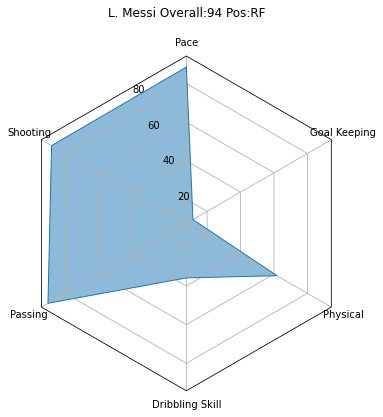

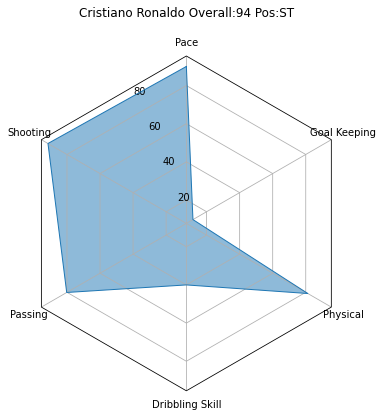

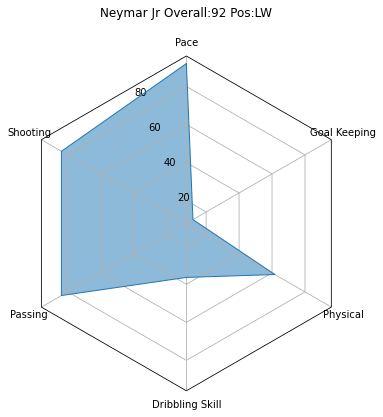

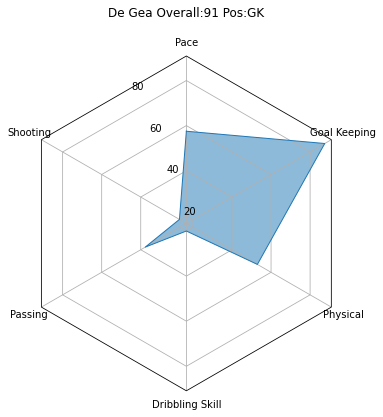

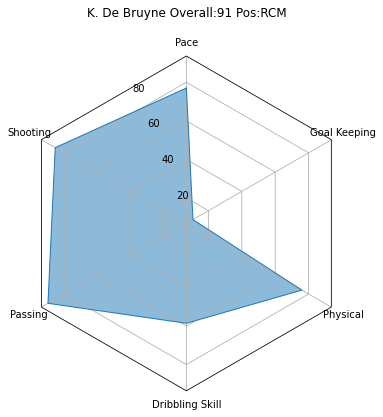

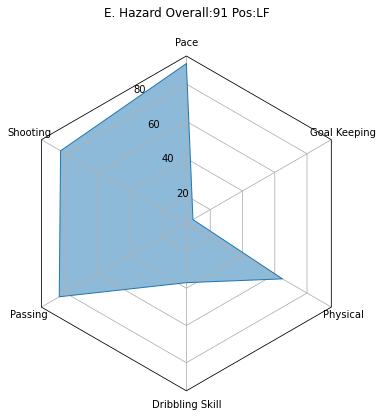

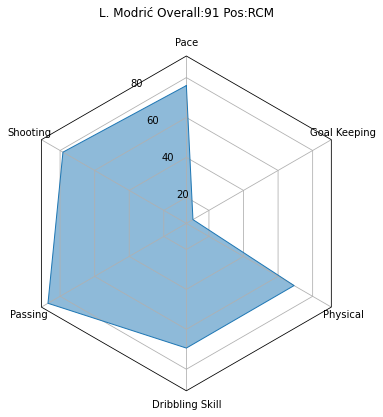

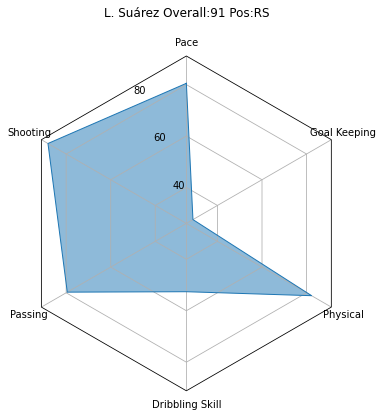

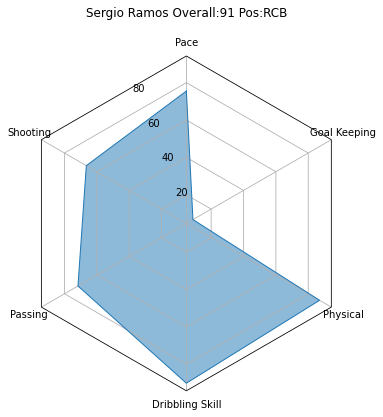

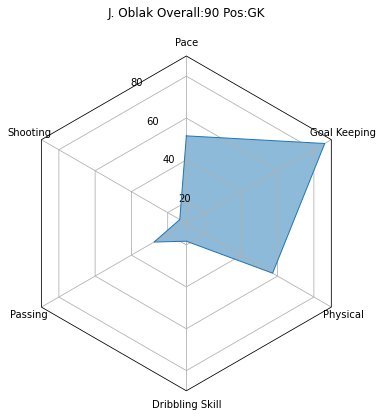

In [126]:
# Function for plotting a radar plot. Taken from (https://stackoverflow.com/questions/52910187/how-to-make-a-polygon-radar-spider-chart-in-python)

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

        def draw(self, renderer):
            """ Draw. If frame is polygon, make gridlines polygon-shaped """
            if frame == 'polygon':
                gridlines = self.yaxis.get_gridlines()
                for gl in gridlines:
                    gl.get_path()._interpolation_steps = num_vars
            super().draw(renderer)


        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)


                return {'polar': spine}
            else:
                raise ValueError("unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

top_10_plot = top_10[['Name','Age','Nationality','Club','Position','Pace','Shooting',
                     'Passing','Dribbling Skill','Physical','Goal Keeping']]
radar_plot_data = top_10[['Pace','Shooting','Passing','Dribbling Skill','Physical','Goal Keeping']]
radar_plot_data  = radar_plot_data.values.tolist()

theta = radar_factory(6, frame='polygon') # Since there are 6 attributes: Pace, Shooting,...,Goal Keeping
spoke_labels = ['Pace','Shooting','Passing','Dribbling Skill','Physical','Goal Keeping']



count = 0
for d in radar_plot_data:
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)
    ax.set_rgrids([20,40, 60, 80])
    ax.set_title(top_10['Name'][count] + " Overall:" + str(top_10['Overall'][count]) + " Pos:"+ top_10['Position'][count],  position=(0.5, 1.1), ha='center')
    count += 1
    line = ax.plot(theta, d, linewidth=1, linestyle='solid')
    ax.fill(theta, d,  alpha=0.5)
    ax.set_varlabels(spoke_labels)

plt.show()

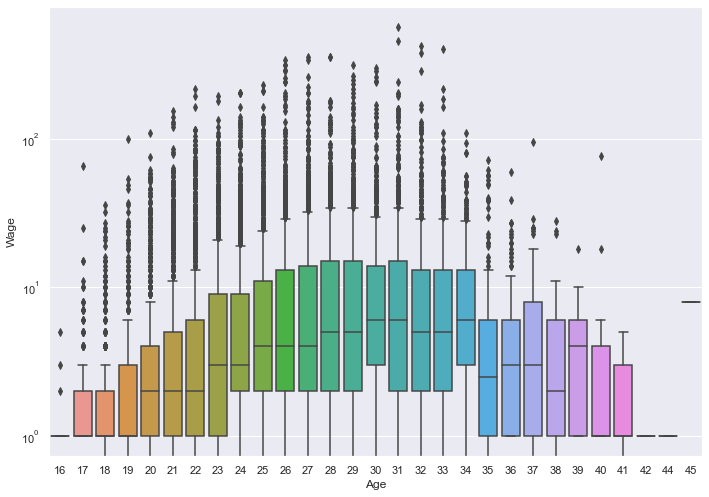

In [164]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='Age', y='Wage', data=dat)
ax.set_yscale("log")

In [143]:
dat[(dat['Age']<31) & (dat['Age']>24)]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,ClubLogo,Value,Wage,Special,PreferredFoot,InternationalReputation,WeakFoot,SkillMoves,WorkRate,BodyType,Position,Joined,ContractValidUntil,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,ReleaseClause,Pace,Shooting,Passing,Dribbling Skill,Physical,Goal Keeping
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118.5,290,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,"Aug 3, 2017",2022,175.26,150.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,92.0,83.833333,83.833333,36.4,61.75,12.00
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72.0,260,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,"Jul 1, 2011",2020,193.04,168.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,57.5,20.166667,37.666667,20.0,53.00,87.50
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102.0,355,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,"Aug 30, 2015",2023,180.34,154.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,77.0,85.333333,89.666667,58.6,76.00,10.75
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,93.0,340,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,"Jul 1, 2012",2020,172.72,163.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1,91.0,83.166667,84.000000,37.0,64.75,9.25
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,68.0,94,1331,Right,3.0,3.0,1.0,Medium/ Medium,Normal,GK,"Jul 16, 2014",2021,187.96,192.0,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144.5,51.5,13.333333,27.500000,18.2,57.25,86.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8241,243591,Fernando Andrade,25,https://cdn.sofifa.org/players/4/19/243591.png,Brazil,https://cdn.sofifa.org/flags/54.png,67,72,Santa Clara,https://cdn.sofifa.org/teams/2/light/1438.png,1.0,2,1544,Right,1.0,2.0,3.0,Medium/ Medium,Normal,RW,"Jul 1, 2017",2019,182.88,165.0,29.0,75.0,68.0,58.0,55.0,67.0,52.0,41.0,41.0,62.0,68.0,65.0,59.0,52.0,61.0,60.0,71.0,70.0,69.0,65.0,55.0,10.0,70.0,55.0,64.0,47.0,26.0,12.0,18.0,8.0,8.0,8.0,8.0,14.0,2.2,66.5,64.833333,46.000000,26.8,66.25,8.00
8460,241595,S. Ngom,25,https://cdn.sofifa.org/players/4/19/241595.png,Senegal,https://cdn.sofifa.org/flags/136.png,67,71,FC Nantes,https://cdn.sofifa.org/teams/2/light/71.png,1.0,9,1617,Right,1.0,4.

[(1, 1000)]

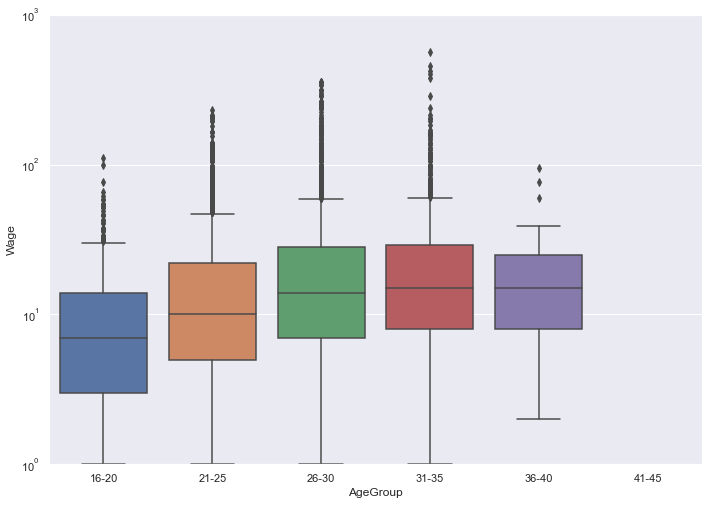

In [180]:
from math import ceil
age_group_strs = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45']
age_groups = [age_group_strs[ceil(age/5.0)-4] for age in dat['Age']]
dat['AgeGroup'] = age_groups
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='AgeGroup', y='Wage', data=dat[dat['Value']>0], order=age_group_strs)
ax.set_yscale("log")
ax.set(ylim=(1,1000))

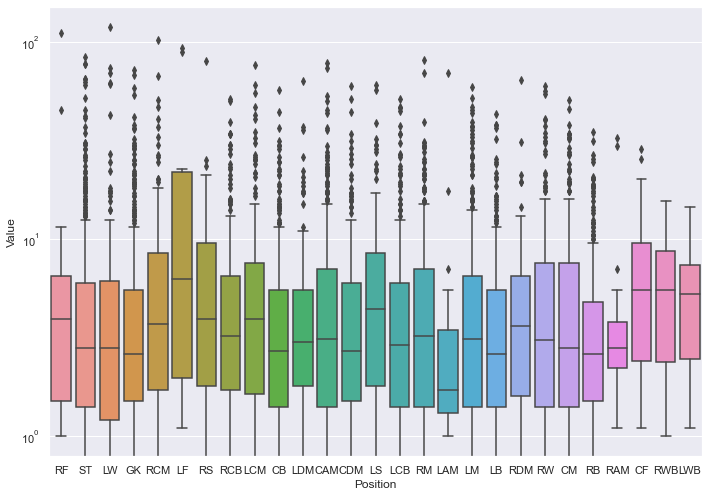

In [179]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.boxplot(x='Position', y='Value', data=dat)
ax.set_yscale("log")

[(0.0, 800.0)]

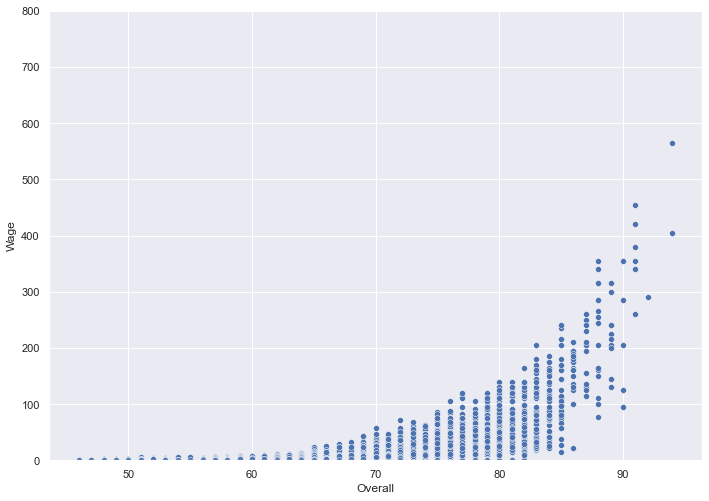

In [190]:
ax = sns.scatterplot(x='Overall', y='Wage',data=dat)
ax.set(ylim=(0,800))

In [191]:
dat["Wage"].max()

565